 ## 1. Introduction

In [148]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [149]:
# Read the data frame
from google.colab import drive
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [150]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

In [151]:
#Ładowanie danych
titanic, titanic_classes = load_dataset('titanic', 'Survived')
print(titanic_classes)


[0 1]


In [152]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,class
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [153]:
# Check columns list and missing values
titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
class            0
dtype: int64

Well isn't that a rare find; no missing values! 

In [154]:
# Get unique count for each variable
titanic.nunique()

PassengerId    891
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
class            2
dtype: int64

In [155]:
# Drop the columns as explained above
titanic = titanic.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis = 1)

In [156]:
# Review the top rows of what is left of the data frame
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,class
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [157]:
# Check variable data types
titanic.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
class          int8
dtype: object

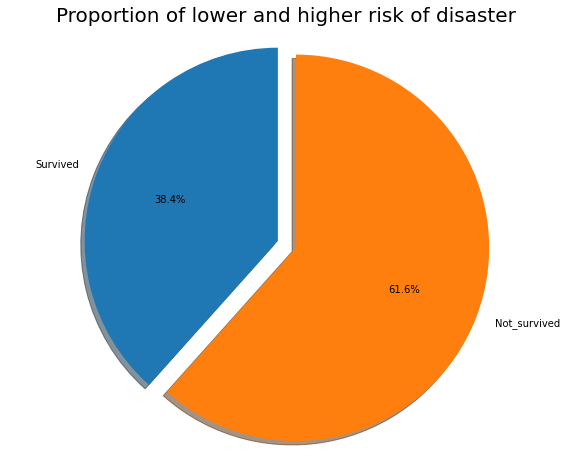

In [158]:
labels = 'Survived', 'Not_survived'
sizes = [titanic['class'][titanic['class']==1].count(), titanic['class'][titanic['class']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of lower and higher risk of disaster", size = 20)
plt.show()

In [159]:
titanic.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
class          int8
dtype: object

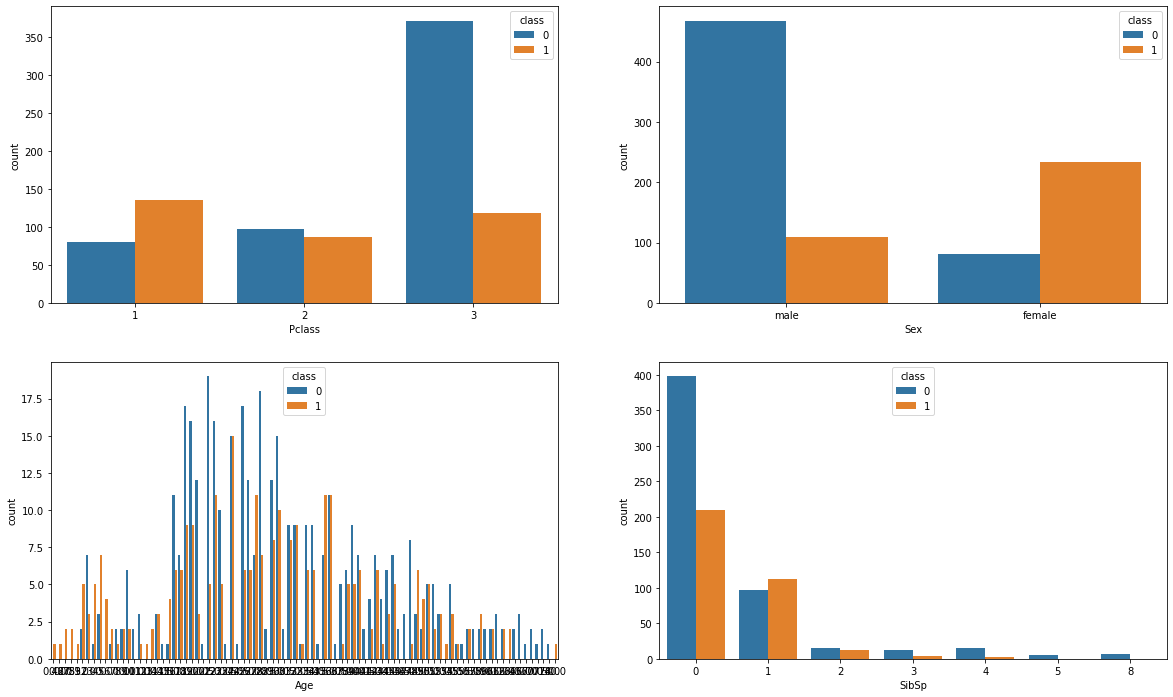

In [160]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Pclass', hue = 'class',data = titanic, ax=axarr[0][0])
    sns.countplot(x='Sex', hue = 'class',data = titanic, ax=axarr[0][1])
    sns.countplot(x='Age', hue = 'class',data = titanic, ax=axarr[1][0])
    sns.countplot(x='SibSp', hue = 'class',data = titanic, ax=axarr[1][1])

In [161]:
#Zamiana wartości pustych 
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
#Zamiana zmiennej ciągłej na zmienną przedziałową
titanic['age_bins'] = pd.cut(x=titanic['Age'], bins=[5, 15, 20, 29, 39, 49, 59, 85])

In [162]:
#Zamiana wartości pustych
titanic['age_bins']= titanic['age_bins'].astype('string')
titanic['age_bins'].fillna('9', inplace=True)
titanic['age_bins'] =titanic['age_bins'].astype('category')


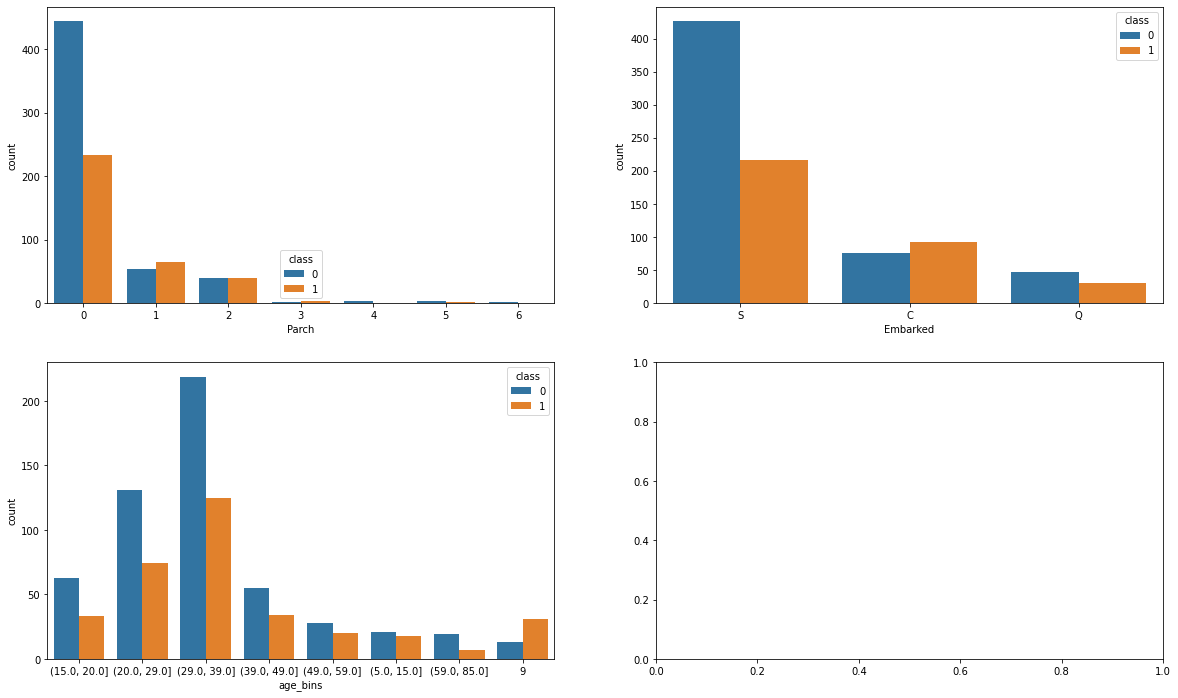

In [163]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Parch', hue = 'class',data = titanic, ax=axarr[0][0])
sns.countplot(x='Embarked', hue = 'class',data = titanic, ax=axarr[0][1])
sns.countplot(x='age_bins', hue = 'class',data = titanic, ax=axarr[1][0])

In [164]:
#Zamiana danych głównie tekstowych na wartości
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # zamienia tekst na liczby
titanic = titanic.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')


In [165]:
conditions = [
    (titanic['Age'] < 35 ) & (titanic['Sex'] == 1),

    (titanic['Age'] > 35) ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
titanic['young_men'] = np.select(conditions, values)

# display updated DataFrame
titanic[titanic['young_men'] == 1]

,Pclass,Sex,Age,SibSp,Parch,Embarked,class,age_bins,young_men
0,2,1,21,1,0,2,0,1,1
5,2,1,32,0,0,1,0,2,1
7,2,1,17,3,1,2,0,7,1
12,2,1,18,0,0,2,0,0,1
16,2,1,17,4,1,1,0,7,1
...,...,...,...,...,...,...,...,...,...
878,2,1,32,0,0,2,0,2,1
883,1,1,29,0,0,2,0,1,1
884,2,1,26,0,0,2,0,1,1
886,1,1,28,0,0,2,0,1,1


In [167]:
conditions = [
    (titanic['Age'] < 35 ) & (titanic['Sex'] == 0),

    (titanic['Age'] > 35) ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
titanic['young_women'] = np.select(conditions, values)

# display updated DataFrame
titanic[titanic['young_women'] == 1]

,Pclass,Sex,Age,SibSp,Parch,Embarked,class,age_bins,young_men,young_women
2,2,0,27,0,0,2,1,1,0,1
8,2,0,28,0,2,2,1,1,0,1
9,1,0,10,1,0,0,1,5,0,1
14,2,0,10,0,0,2,0,5,0,1
19,2,0,32,0,0,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...
875,2,0,12,0,0,0,1,5,0,1
880,1,0,26,0,1,2,1,1,0,1
882,2,0,21,0,0,2,0,1,0,1
887,0,0,16,0,0,2,1,0,0,1


In [168]:
#Podział na dane treningowe i etykiety
y = titanic.pop('class')
X = titanic
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42, stratify=y)

In [169]:
# Resulting Data Frame
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,age_bins,young_men,young_women
381,2,0,5,0,2,0,7,0,1
325,0,0,43,0,0,0,2,0,0
125,2,1,8,1,0,0,5,1,0
597,2,1,60,0,0,2,3,0,0
85,2,0,39,3,0,2,2,0,0


## 5. Data prep for model fitting

In [170]:
# minMax scaling the continuous variables
minVec = X_train.min().copy()
maxVec = X_train.max().copy()
X_train = (X_train-minVec)/(maxVec-minVec)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,age_bins,young_men,young_women
381,1.0,0.0,0.056818,0.000000,0.333333,0.000000,1.000000,0.0,1.0
325,0.0,0.0,0.488636,0.000000,0.000000,0.000000,0.285714,0.0,0.0
125,1.0,1.0,0.090909,0.166667,0.000000,0.000000,0.714286,1.0,0.0
597,1.0,1.0,0.681818,0.000000,0.000000,0.666667,0.428571,0.0,0.0
85,1.0,0.0,0.443182,0.500000,0.000000,0.666667,0.285714,0.0,0.0


## 6. Model fitting and selection
For the model fitting, I will try out the following
* Logistic regression in the primal space and with different kernels
* Ensemble models

In [171]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [183]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [184]:
# Fit primal logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X_train,y_train)



GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'max_iter': [250], 'penalty': ['l2'],
                         'tol': [1e-05, 0.0001, 1e-06]})

In [185]:
# Fit random forest classifier
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 6, 7, 8],
                         'max_features': [2, 4, 6, 7, 8, 9]})

In [186]:
RanFor_grid.best_params_

{'max_depth': 5, 'max_features': 6}

### Fit best Models

In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_train, log_primal_Grid.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       367
           1       0.79      0.73      0.76       229

    accuracy                           0.82       596
   macro avg       0.81      0.81      0.81       596
weighted avg       0.82      0.82      0.82       596



In [188]:
print(classification_report(y_train,  RanFor_grid.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       367
           1       0.88      0.74      0.80       229

    accuracy                           0.86       596
   macro avg       0.87      0.84      0.85       596
weighted avg       0.86      0.86      0.86       596



In [189]:
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [190]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal_Grid.predict(X),log_primal_Grid.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RanFor_grid.predict(X),RanFor_grid.predict_proba(X)[:,1])


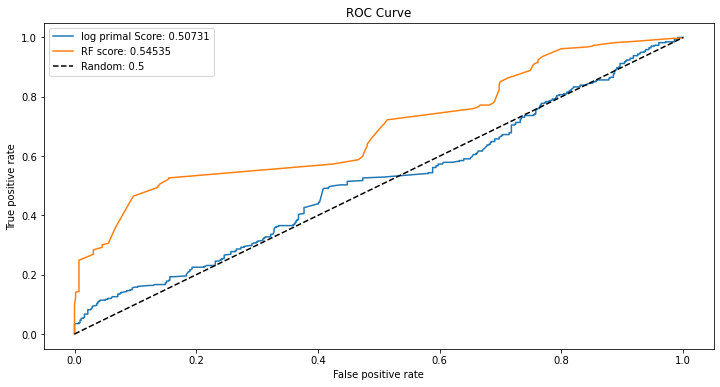

In [191]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

### Test model prediction accuracy on test data

In [197]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)
Xsm_train, ysm_train = sm.fit_resample(X_train, y_train)

In [198]:
#tree after smote
X_train,y_train
logistic_sm = LogisticRegression(random_state=1, C=100).fit(Xsm_train, ysm_train)
print("LogisticRegression validation score after smote: {:.2f}".format(logistic_sm.score(X_test, y_test)))
logistic_sm_crossval = cross_val_score(logistic_sm, X_test,y_test)
print("LogisticRegression cross-validation score after smote: {:.2f}".format(logistic_sm_crossval.mean()))

#random forest model after downsampled
forest_sm = RandomForestClassifier(random_state=1).fit(Xsm_train, ysm_train)
print("\nRandom Forest validation score after smote: {:.2f}".format(forest_sm.score(X_test, y_test)))
forest_sm_crossval = cross_val_score(forest_sm, X_test, y_test)
print("Random Forest cross-validation score after smote: {:.2f}".format(forest_sm_crossval.mean()))



LogisticRegression validation score after smote: 0.62


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression cross-validation score after smote: 0.80

Random Forest validation score after smote: 0.55
Random Forest cross-validation score after smote: 0.80


In [199]:
print(classification_report(y_test,  forest_sm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59       182
           1       0.44      0.60      0.51       113

    accuracy                           0.55       295
   macro avg       0.56      0.56      0.55       295
weighted avg       0.58      0.55      0.55       295

